In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/app-human-horse

/content/drive/MyDrive/app-human-horse


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
import tensorflow
print(tensorflow.__version__)

1.15.2


#Data Preprocessing

In [5]:
import cv2,os
dataset='/content/drive/MyDrive/app-human-horse/dataset'
classes=os.listdir(dataset)
labels=[i for i in range(len(classes))]

dicionario=dict(zip(classes,labels)) 
print(dicionario)
print(classes)
print(labels)

{'humans': 0, 'horses': 1}
['humans', 'horses']
[0, 1]


In [6]:
img_size=100
data=[]
target=[]

for classe in classes:
    pasta=os.path.join(dataset,classe)
    img_names=os.listdir(pasta)
        
    for img_name in img_names:
        imagem=os.path.join(pasta,img_name)
        img=cv2.imread(imagem)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            data.append(resized)
            target.append(dicionario[classe])
        except Exception as e:
            print('Exception:',e)

In [30]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [31]:
new_target.shape

(1027, 2)

In [32]:
data.shape

(1027, 100, 100, 3)

In [33]:
data.shape[1:]

(100, 100, 3)

In [34]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

In [57]:

model = keras.Sequential([
    
    layers.Conv2D(200, (3,3), activation='relu', input_shape=data.shape[1:]),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(100, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 98, 98, 200)       5600      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 52900)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2645050   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [59]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [60]:
train_data.shape

(924, 100, 100, 3)

In [61]:
train_target.shape

(924, 2)

In [62]:
epoch_hist=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Train on 739 samples, validate on 185 samples
Epoch 1/200


InvalidArgumentError: ignored

In [ ]:
model.save('model.h5')

In [ ]:
from matplotlib import pyplot as plt

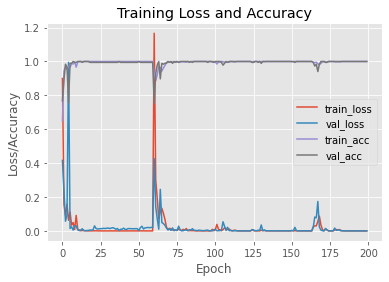

In [ ]:
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), epoch_hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), epoch_hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), epoch_hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), epoch_hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
train_loss, train_accuracy = model.evaluate(train_data,  train_target, verbose=2)
test_loss, test_accuracy = model.evaluate(test_data,  test_target, verbose=2)

In [ ]:
predictions = model.predict(test_data)

In [ ]:

item = 4

print("\nClasse predita foi {} com {:2.0f}%. Classe correta é {}, {}.".format(np.argmax(predictions[item]), 
                                                                 100*np.max(predictions[item]),
                                                                 test_target[item], 
                                                                 new_target[test_target[item]]))

a=100*np.max(predictions[item])

IndexError: ignored